In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('glass-source-classification-dataset.csv')

In [ ]:
df.sample(10)

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
88,88,1.51618,13.01,3.50,1.48,72.89,0.60,8.12,Does not exist,Does not exist,building_window glass
38,38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,Does not exist,Does not exist,building_window glass
6,6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,Does not exist,Does not exist,building_window glass
106,106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,exists,exists,building_window glass
176,176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,Does not exist,Does not exist,tableware glass
45,45,1.51900,13.49,3.48,1.35,71.95,0.55,9.00,Does not exist,Does not exist,building_window glass
212,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,exists,Does not exist,headlamp glass
47,47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,Does not exist,exists,building_window glass
196,196,1.51556,13.87,0.00,2.54,73.23,0.14,NaN,exists,exists,headlamp glass
199,199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,exists,Does not exist,headlamp glass


In [ ]:
df = df.fillna(0)
df["Type"] = df["Type"].astype('category')
df["Type"] = df["Type"].cat.codes
df.sample(10)

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
23,23,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,Does not exist,Does not exist,0
37,37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,Does not exist,Does not exist,0
43,43,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,Does not exist,Does not exist,0
88,88,1.51618,13.01,3.50,1.48,72.89,0.60,8.12,Does not exist,Does not exist,0
137,137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,Does not exist,Does not exist,0
74,74,1.51596,13.02,3.56,1.54,73.11,0.72,7.90,Does not exist,Does not exist,0
158,158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,Does not exist,Does not exist,4
209,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,exists,Does not exist,2
161,161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,exists,exists,4
200,200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,exists,Does not exist,2


In [ ]:
df['Ba'] = df['Ba'].map({'Does not exist':0, 'exists': 1})
df['Fe'] = df['Fe'].map({'Does not exist':0, 'exists': 1})
df.tail()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1,0,2
210,210,1.51685,14.92,0.0,1.99,73.06,0.00,0.00,1,0,2
211,211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1,0,2
212,212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1,0,2
213,213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1,0,2


In [ ]:
y = df['Type']
df=((df-df.min())/(df.max()-df.min()))
df.sample(10)

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
136,0.638498,0.303336,0.341353,0.846325,0.246106,0.582143,0.090177,0.517603,0.0,1.0,0.00
86,0.403756,0.199298,0.377444,0.777283,0.367601,0.614286,0.061192,0.495985,0.0,0.0,0.00
206,0.967136,0.232660,0.633083,0.000000,0.492212,0.589286,0.000000,0.535516,1.0,0.0,0.50
99,0.464789,0.305531,0.335338,0.659243,0.355140,0.555357,0.096618,0.542928,1.0,0.0,0.00
89,0.417840,0.230465,0.273684,0.775056,0.492212,0.610714,0.101449,0.499074,0.0,1.0,0.00
152,0.713615,0.291484,0.437594,0.812918,0.112150,0.569643,0.009662,0.551575,0.0,0.0,1.00
181,0.849765,0.339333,0.640602,0.173719,0.451713,0.480357,0.000000,0.614577,0.0,0.0,0.75
92,0.431925,0.207638,0.359398,0.759465,0.401869,0.616071,0.011272,0.518221,0.0,1.0,0.00
193,0.906103,0.265145,0.604511,0.000000,0.532710,0.573214,0.000000,0.526868,1.0,1.0,0.50
11,0.051643,0.284460,0.311278,0.815145,0.305296,0.571429,0.096618,0.528721,0.0,0.0,0.00


In [ ]:
predictors = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X = df[predictors]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn import svm
clfSVM = svm.SVC(decision_function_shape='ovo')
clfSVM.fit(X_train, y_train)
y_pred_SVM = clfSVM.predict(X_test)
score_SVM = accuracy_score(y_pred_SVM, y_test)
print(score_SVM)

0.813953488372093


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clfRFC = RandomForestClassifier(n_estimators=9)
clfRFC.fit(X_train, y_train)
y_pred_RFC = clfRFC.predict(X_test)
score_RFC = accuracy_score(y_pred_RFC, y_test)
print(score_RFC)

0.8604651162790697


In [ ]:
from sklearn.neural_network import MLPClassifier
clfMLP = MLPClassifier(hidden_layer_sizes=200, activation='relu', solver='adam', max_iter=1000, alpha=0.0001, batch_size=50, learning_rate_init=0.005, n_iter_no_change=10, tol=1e-4, verbose=True)
clfMLP.fit(X_train, y_train)
y_pred_MLP = clfMLP.predict(X_test)
score_MLP = accuracy_score(y_pred_MLP, y_test)
print(score_MLP)

Iteration 1, loss = 1.56161241
Iteration 2, loss = 1.06736945
Iteration 3, loss = 0.93669418
Iteration 4, loss = 0.89094058
Iteration 5, loss = 0.79443904
Iteration 6, loss = 0.73664932
Iteration 7, loss = 0.69999742
Iteration 8, loss = 0.66102335
Iteration 9, loss = 0.63185423
Iteration 10, loss = 0.60884776
Iteration 11, loss = 0.58847082
Iteration 12, loss = 0.57119807
Iteration 13, loss = 0.55620960
Iteration 14, loss = 0.54032727
Iteration 15, loss = 0.52937379
Iteration 16, loss = 0.51787849
Iteration 17, loss = 0.51253161
Iteration 18, loss = 0.50155791
Iteration 19, loss = 0.48985314
Iteration 20, loss = 0.48135319
Iteration 21, loss = 0.47446369
Iteration 22, loss = 0.47294696
Iteration 23, loss = 0.46064546
Iteration 24, loss = 0.45484085
Iteration 25, loss = 0.44719594
Iteration 26, loss = 0.44119590
Iteration 27, loss = 0.43793898
Iteration 28, loss = 0.43543782
Iteration 29, loss = 0.42556621
Iteration 30, loss = 0.42181914
Iteration 31, loss = 0.41609581
Iteration 32, los

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca)

[[-5.81388631e-02  7.86488866e-01 -5.91944465e-03  1.30732171e-01]
 [-4.16821350e-01 -1.63451437e-01 -1.34667621e-01  5.35219396e-02]
 [-1.69049690e-01 -2.64395274e-01  1.80457259e-01 -5.23148430e-02]
 [-4.30698426e-01 -1.35560289e-01 -2.40514733e-02  3.25509616e-01]
 [-1.44390249e-02  7.41571913e-01 -9.50422415e-02 -1.26078986e-01]
 [-3.58913193e-01 -1.86851557e-01 -2.98854189e-02 -5.45234647e-02]
 [ 7.12238844e-01  5.08737480e-01 -5.60199012e-01  2.17448589e-01]
 [-3.42113888e-01 -1.97973267e-01 -4.63957561e-02 -2.85704196e-02]
 [ 9.27724694e-01  4.30871660e-01 -2.65576029e-01  2.33589824e-01]
 [ 6.65729999e-02 -4.13553470e-01  3.73336642e-01 -5.45557604e-01]
 [ 4.64246496e-01 -5.03927997e-01 -6.49730035e-01 -4.00986013e-02]
 [ 1.23770502e+00  2.73150428e-01 -1.77863623e-02 -1.69364350e-01]
 [-4.08766900e-01 -1.47611420e-01 -4.84759472e-02  3.16354166e-01]
 [-1.40856013e-01 -2.66214897e-01  2.71780822e-01 -7.00572335e-02]
 [-2.82324198e-01 -2.14375792e-01  7.96269317e-02 -2.28428617e

In [ ]:
clfSVM_pca = svm.SVC(decision_function_shape='ovo')
clfSVM_pca.fit(X_train_pca, y_train)
y_pred_SVM_pca = clfSVM_pca.predict(X_test_pca)
score_SVM_pca_reduced = accuracy_score(y_pred_SVM_pca, y_test)
print(score_SVM_pca_reduced)

0.7906976744186046


In [ ]:
clfRFC_pca = RandomForestClassifier(n_estimators=9)
clfRFC_pca.fit(X_train_pca, y_train)
y_pred_RFC_pca = clfRFC_pca.predict(X_test_pca)
score_RFC_pca_reduced = accuracy_score(y_pred_RFC_pca, y_test)
print(score_RFC_pca_reduced)

0.7906976744186046


In [ ]:
clfMLP_pca = MLPClassifier(hidden_layer_sizes=200, activation='relu', solver='adam', max_iter=1000, alpha=0.0001, batch_size=50, learning_rate_init=0.005, n_iter_no_change=10, tol=1e-4, verbose=True)
clfMLP_pca.fit(X_train_pca, y_train)
y_pred_MLP_pca = clfMLP_pca.predict(X_test_pca)
score_MLP_pca_reduced = accuracy_score(y_pred_MLP_pca, y_test)
print(score_MLP_pca_reduced)

Iteration 1, loss = 1.47352901
Iteration 2, loss = 1.20024767
Iteration 3, loss = 0.99074815
Iteration 4, loss = 0.85976164
Iteration 5, loss = 0.79167672
Iteration 6, loss = 0.74044379
Iteration 7, loss = 0.69469579
Iteration 8, loss = 0.65303610
Iteration 9, loss = 0.61869016
Iteration 10, loss = 0.59480895
Iteration 11, loss = 0.57299514
Iteration 12, loss = 0.55773083
Iteration 13, loss = 0.54337366
Iteration 14, loss = 0.53325031
Iteration 15, loss = 0.52182947
Iteration 16, loss = 0.51251596
Iteration 17, loss = 0.50364054
Iteration 18, loss = 0.49697133
Iteration 19, loss = 0.48769305
Iteration 20, loss = 0.48184719
Iteration 21, loss = 0.47696213
Iteration 22, loss = 0.47231903
Iteration 23, loss = 0.46675621
Iteration 24, loss = 0.46169281
Iteration 25, loss = 0.45806490
Iteration 26, loss = 0.45377804
Iteration 27, loss = 0.44937942
Iteration 28, loss = 0.44608153
Iteration 29, loss = 0.44317088
Iteration 30, loss = 0.43933808
Iteration 31, loss = 0.43904565
Iteration 32, los

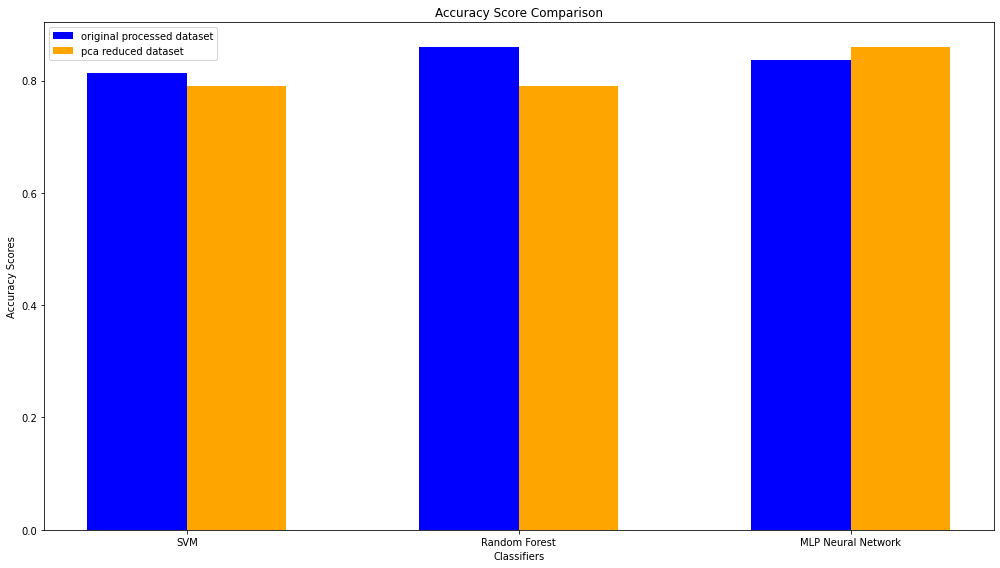

In [ ]:
import matplotlib.pyplot as plt

normalized_original_dataset = [score_SVM, score_RFC, score_MLP]
pca_reduced_dataset = [score_SVM_pca_reduced, score_RFC_pca_reduced, score_MLP_pca_reduced]

fig, ax = plt.subplots(figsize =(14, 8))
bar_width = 0.3
X = np.arange(3)

p1 = plt.bar(X, normalized_original_dataset, bar_width, color='blue', label='original processed dataset')
p2 = plt.bar(X + bar_width, pca_reduced_dataset, bar_width, color='orange', label='pca reduced dataset')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Score Comparison')
plt.xticks(X + (bar_width/2) , ("SVM", "Random Forest", 
"MLP Neural Network"))
plt.legend()

plt.tight_layout()
plt.show()